# Graded Challenge 2 Phase 1

Holla.. Irpan Habibi's here from Batch 004 Hacktiv8's Fulltime Data Science Programs

Graded Challenge 2 Phase 1 was created to apply the following Logistic Regression and SVM concepts:

- Able to understand the concept of Classification with Logistic Regression and SVM
- Able to prepare data for use in Logistic Regression and SVM models
- Able to implement Logistic Regression and SVM to make predictions

***i. Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from statsmodels.tools import add_constant as add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

***ii. Data Loading***

*Preview the Dataset*

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

*View summary of dataset*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

*View statistical properties of dataset*

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


***iii. Data Cleaning***

*View missing value*

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
missing_max= (15000/145460)*100
missing_max

10.31211329575141

*make a duplicate of the dataset for handling missing values so as not to change the dataset that has been loaded*

In [9]:
dfc = df.copy()

*change "Date" datatype from object to datetime*

In [10]:
dfc['Date'] = pd.to_datetime(dfc['Date'])

In [11]:
dfc['Year'] = dfc['Date'].dt.year
dfc['Month'] = dfc['Date'].dt.month
dfc['Day'] = dfc['Date'].dt.day

In [12]:
dfc.drop('Date', axis=1, inplace = True)

dfc.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


*split and view between categorical and numerical columns and handling missing values on it*

In [13]:
categorical = [var for var in dfc.columns if dfc[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [14]:
dfc[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

*handling missing values on categorical columns with mode*

In [15]:
dfc['WindGustDir'] = dfc['WindGustDir'].fillna(dfc['WindGustDir'].mode()[0])
dfc['WindDir9am'] = dfc['WindDir9am'].fillna(dfc['WindDir9am'].mode()[0])
dfc['WindDir3pm'] = dfc['WindDir3pm'].fillna(dfc['WindDir3pm'].mode()[0])
dfc['RainToday'] = dfc['RainToday'].fillna(dfc['RainToday'].mode()[0])
dfc['RainTomorrow'] = dfc['RainTomorrow'].fillna(dfc['RainTomorrow'].mode()[0])

In [16]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [17]:
dfc[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

*handling missing values on numerical columns with mean*

In [18]:
dfc['Evaporation'] = dfc['Evaporation'].fillna(dfc['Evaporation'].median())
dfc['Sunshine'] = dfc['Sunshine'].fillna(dfc['Sunshine'].median())
dfc['WindGustSpeed'] = dfc['WindGustSpeed'].fillna(dfc['WindGustSpeed'].median())
dfc['Pressure9am'] = dfc['Pressure9am'].fillna(dfc['Pressure9am'].median())
dfc['Pressure3pm'] = dfc['Pressure3pm'].fillna(dfc['Pressure3pm'].median())
dfc['Cloud9am'] = dfc['Cloud9am'].fillna(dfc['Cloud9am'].median())
dfc['Cloud3pm'] = dfc['Cloud3pm'].fillna(dfc['Cloud3pm'].median())

In [19]:
dfc.dropna(inplace=True)

In [20]:
dfc.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [21]:
dfc.shape

(136806, 25)

*Showing distribution and outlier*

In [22]:
dfc[numerical].columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [23]:
print(round(dfc[numerical].describe()))

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  136806.0  136806.0  136806.0     136806.0  136806.0       136806.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          3.0       3.0           13.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          4.0       8.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          5.0       9.0           46.0   
max        34.0      48.0     371.0         82.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      136806.0      136806.0     136806.0     136806.0     136806.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

<AxesSubplot:>

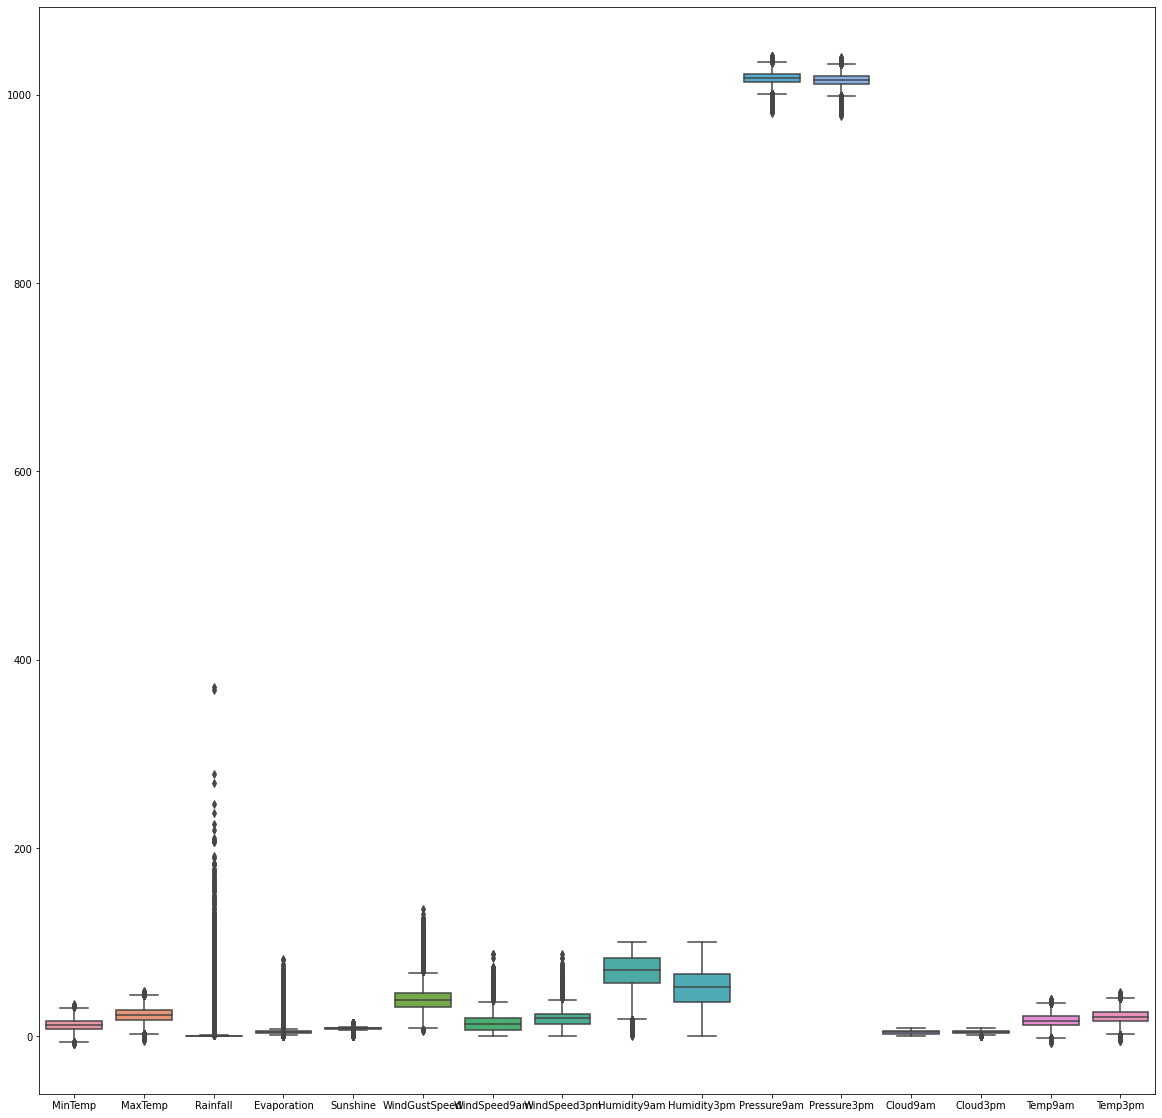

In [24]:
plt.figure(figsize=(20,20))

sns.boxplot(data=dfc[numerical])

Text(0, 0.5, 'WindSpeed3pm')

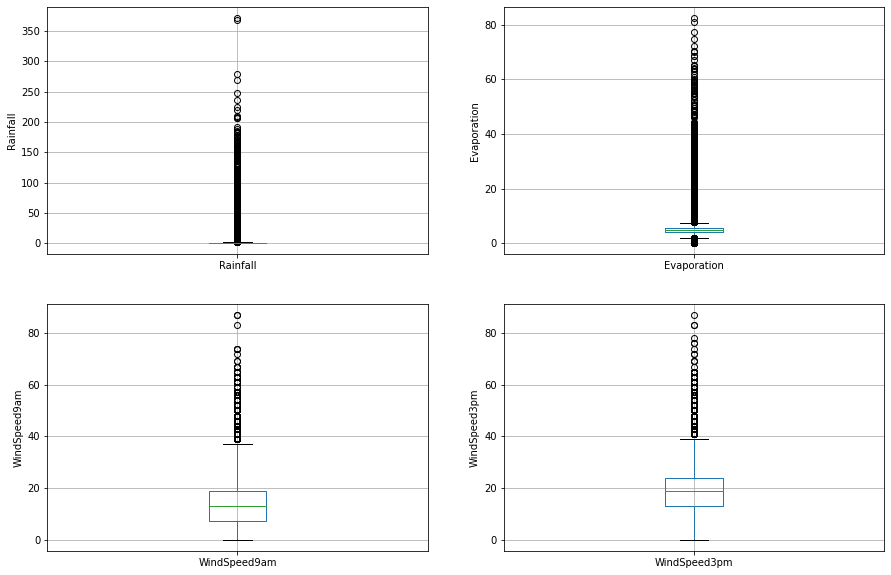

In [25]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = dfc.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = dfc.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = dfc.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = dfc.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [26]:
Q1 = dfc.quantile(0.25)
Q3 = dfc.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MinTemp           9.2
MaxTemp          10.3
Rainfall          0.6
Evaporation       1.4
Sunshine          0.8
WindGustSpeed    15.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      30.0
Pressure9am       8.4
Pressure3pm       8.5
Cloud9am          3.0
Cloud3pm          2.0
Temp9am           9.3
Temp3pm           9.8
Year              5.0
Month             6.0
Day              15.0
dtype: float64


In [27]:
dfc.shape

(136806, 25)

In [28]:
rains =dfc.copy()

***iv. EDA***

*The objective in this time is to create a model with column a as the label for prediction, so let's start analyzing the value of the target*

In [29]:
print('frequency distribution of Rain Tomorrow is :\n',rains['RainTomorrow'].value_counts())
print('Percentage of frequency distribution of Rain Tomorrow is :\n',rains['RainTomorrow'].value_counts()/len(rains))

frequency distribution of Rain Tomorrow is :
 No     106912
Yes     29894
Name: RainTomorrow, dtype: int64
Percentage of frequency distribution of Rain Tomorrow is :
 No     0.781486
Yes    0.218514
Name: RainTomorrow, dtype: float64


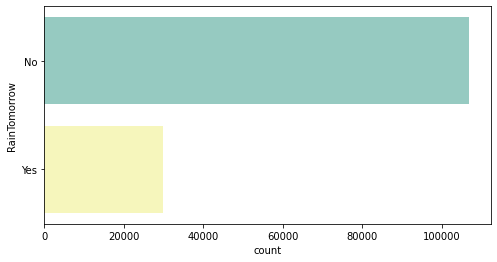

In [30]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="RainTomorrow", data=rains, palette="Set3")
plt.show()

*We can see that out of the total number of RainTomorrow values, No appears 77.58% times and Yes appears 22.42% times*

Text(0, 0.5, 'RainTomorrow')

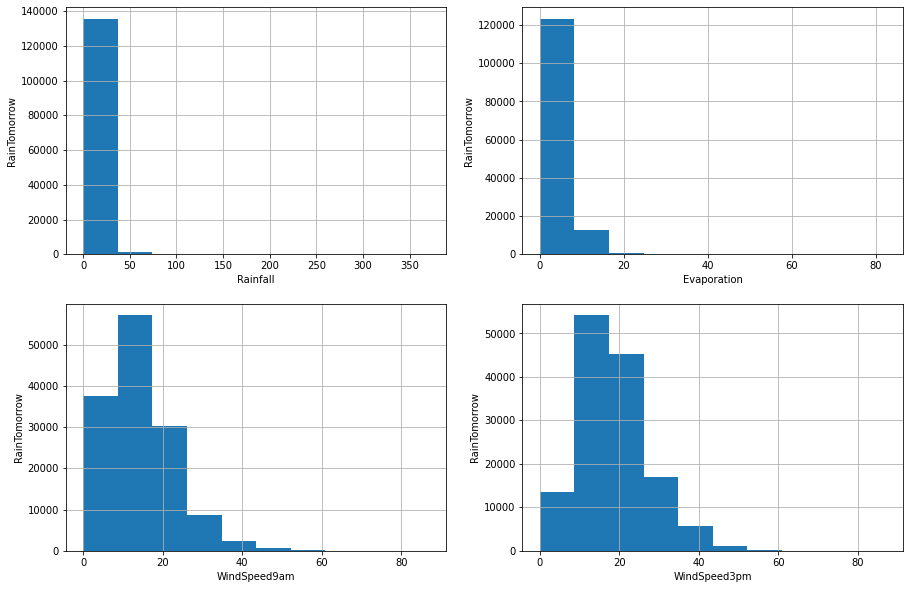

In [31]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = rains.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = rains.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = rains.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = rains.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

*We can see that all the four variables are skewed*

**Multivariate Analysis**

- An important step in EDA is to discover patterns and relationships between variables in the dataset.

- I will use heat map and pair plot to discover the patterns and relationships in the dataset.


In [32]:
rains.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
MinTemp,1.000000,0.732947,0.105267,0.373794,0.031912,0.178833,0.182522,0.179790,-0.238789,0.006713,-0.424279,-0.433212,0.045355,-0.001222,0.901207,0.707999,0.023995,-0.206081,0.001045
MaxTemp,0.732947,1.000000,-0.074697,0.459607,0.323196,0.072451,0.018968,0.053493,-0.510002,-0.509211,-0.307687,-0.395843,-0.231841,-0.224130,0.886059,0.984486,0.046737,-0.168518,-0.000725
Rainfall,0.105267,-0.074697,1.000000,-0.046653,-0.176820,0.129132,0.087637,0.059534,0.223992,0.255356,-0.161213,-0.121259,0.166582,0.143819,0.010711,-0.078676,-0.010872,-0.030648,0.001974
Evaporation,0.373794,0.459607,-0.046653,1.000000,0.284899,0.154342,0.153923,0.104187,-0.396157,-0.303381,-0.217066,-0.236724,-0.173996,-0.165397,0.434857,0.446234,0.041593,-0.023021,-0.005159
Sunshine,0.031912,0.323196,-0.176820,0.284899,1.000000,-0.031278,-0.009805,0.024614,-0.337793,-0.439626,0.038225,-0.008477,-0.519254,-0.536661,0.193491,0.337228,0.041996,0.017612,-0.001082
WindGustSpeed,0.178833,0.072451,0.129132,0.154342,-0.031278,1.000000,0.585644,0.662349,-0.213064,-0.027651,-0.429885,-0.388541,0.046066,0.073871,0.150078,0.033663,-0.028139,0.058367,-0.008654
WindSpeed9am,0.182522,0.018968,0.087637,0.153923,-0.009805,0.585644,1.000000,0.519844,-0.272074,-0.031572,-0.216692,-0.167180,0.001767,0.028118,0.133512,0.003362,-0.016766,0.051069,-0.008468
WindSpeed3pm,0.179790,0.053493,0.059534,0.104187,0.024614,0.662349,0.519844,1.000000,-0.146177,0.017989,-0.280809,-0.243479,0.030317,0.009324,0.168422,0.027387,-0.030898,0.060374,-0.009310
Humidity9am,-0.238789,-0.510002,0.223992,-0.396157,-0.337793,-0.213064,-0.272074,-0.146177,1.000000,0.668345,0.133906,0.178688,0.358849,0.282504,-0.477902,-0.500504,0.008620,-0.089188,0.015558
Humidity3pm,0.006713,-0.509211,0.255356,-0.303381,-0.439626,-0.027651,-0.031572,0.017989,0.668345,1.000000,-0.026145,0.049416,0.406800,0.407521,-0.223612,-0.558208,-0.009803,-0.018384,0.013138


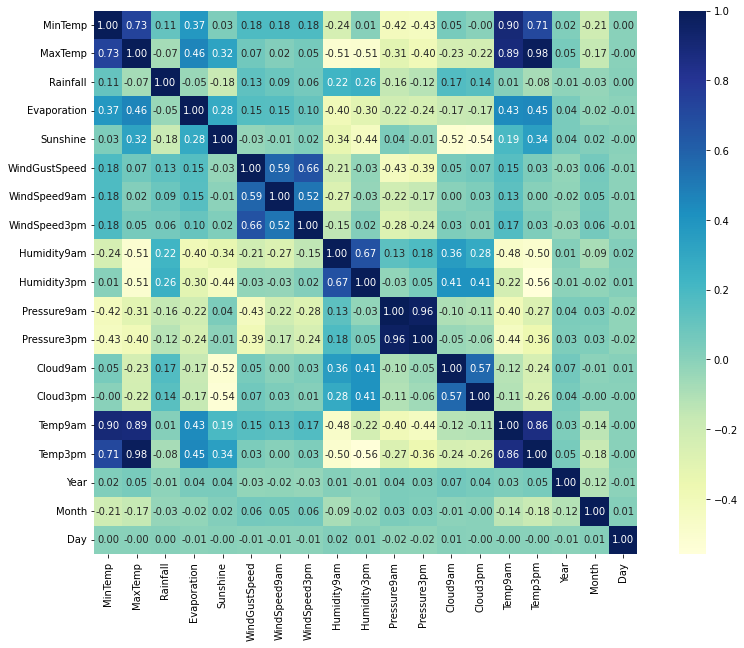

In [33]:
plt.figure(figsize = (15, 10))
sns.heatmap(rains.corr(), annot = True, square=True, fmt='.2f', cmap="YlGnBu")
plt.show()

*From the above correlation heat map, we can conclude that many variables are highly positively correlated, that is MinTemp, MaxTemp, Temp9am, etc. So, I'll plot the variables which are highly positively correlated to to discover the patterns and relationships in the dataset.*

In [34]:
high_corr = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed',
             'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

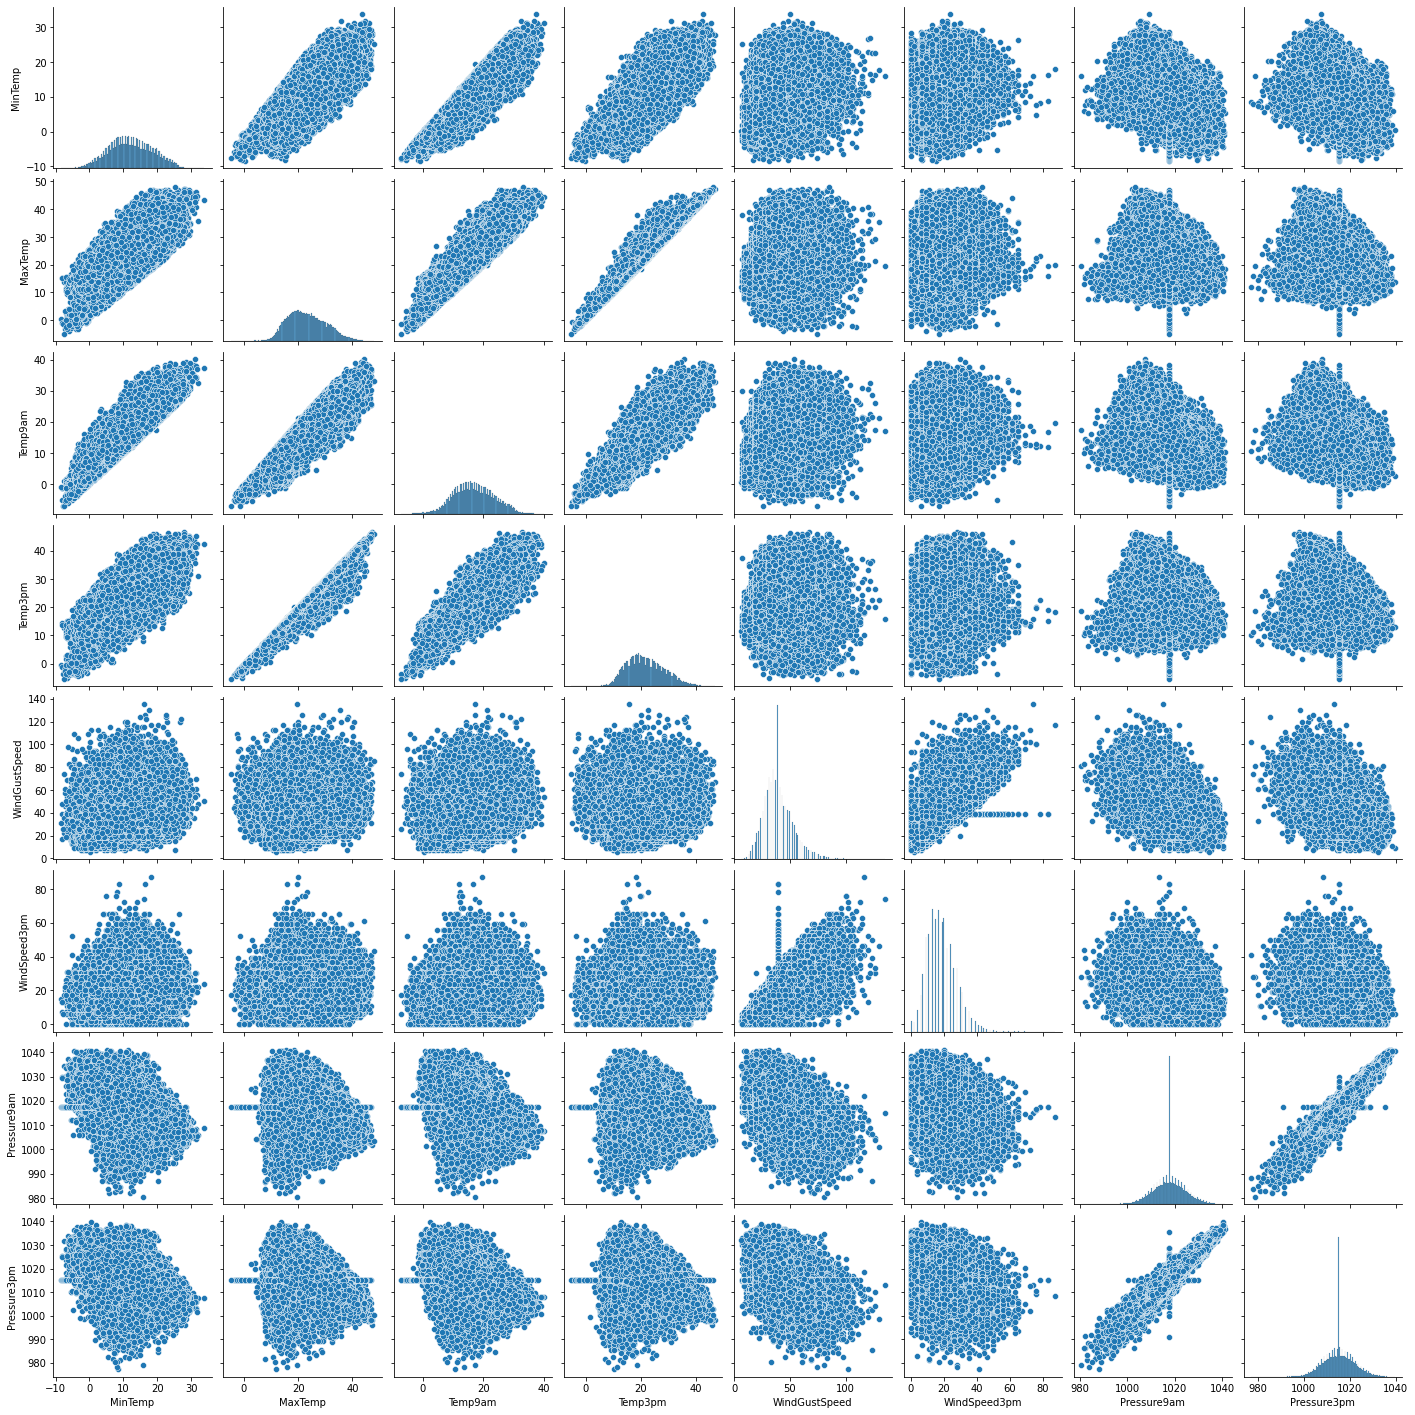

In [35]:
sns.pairplot(rains[high_corr], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

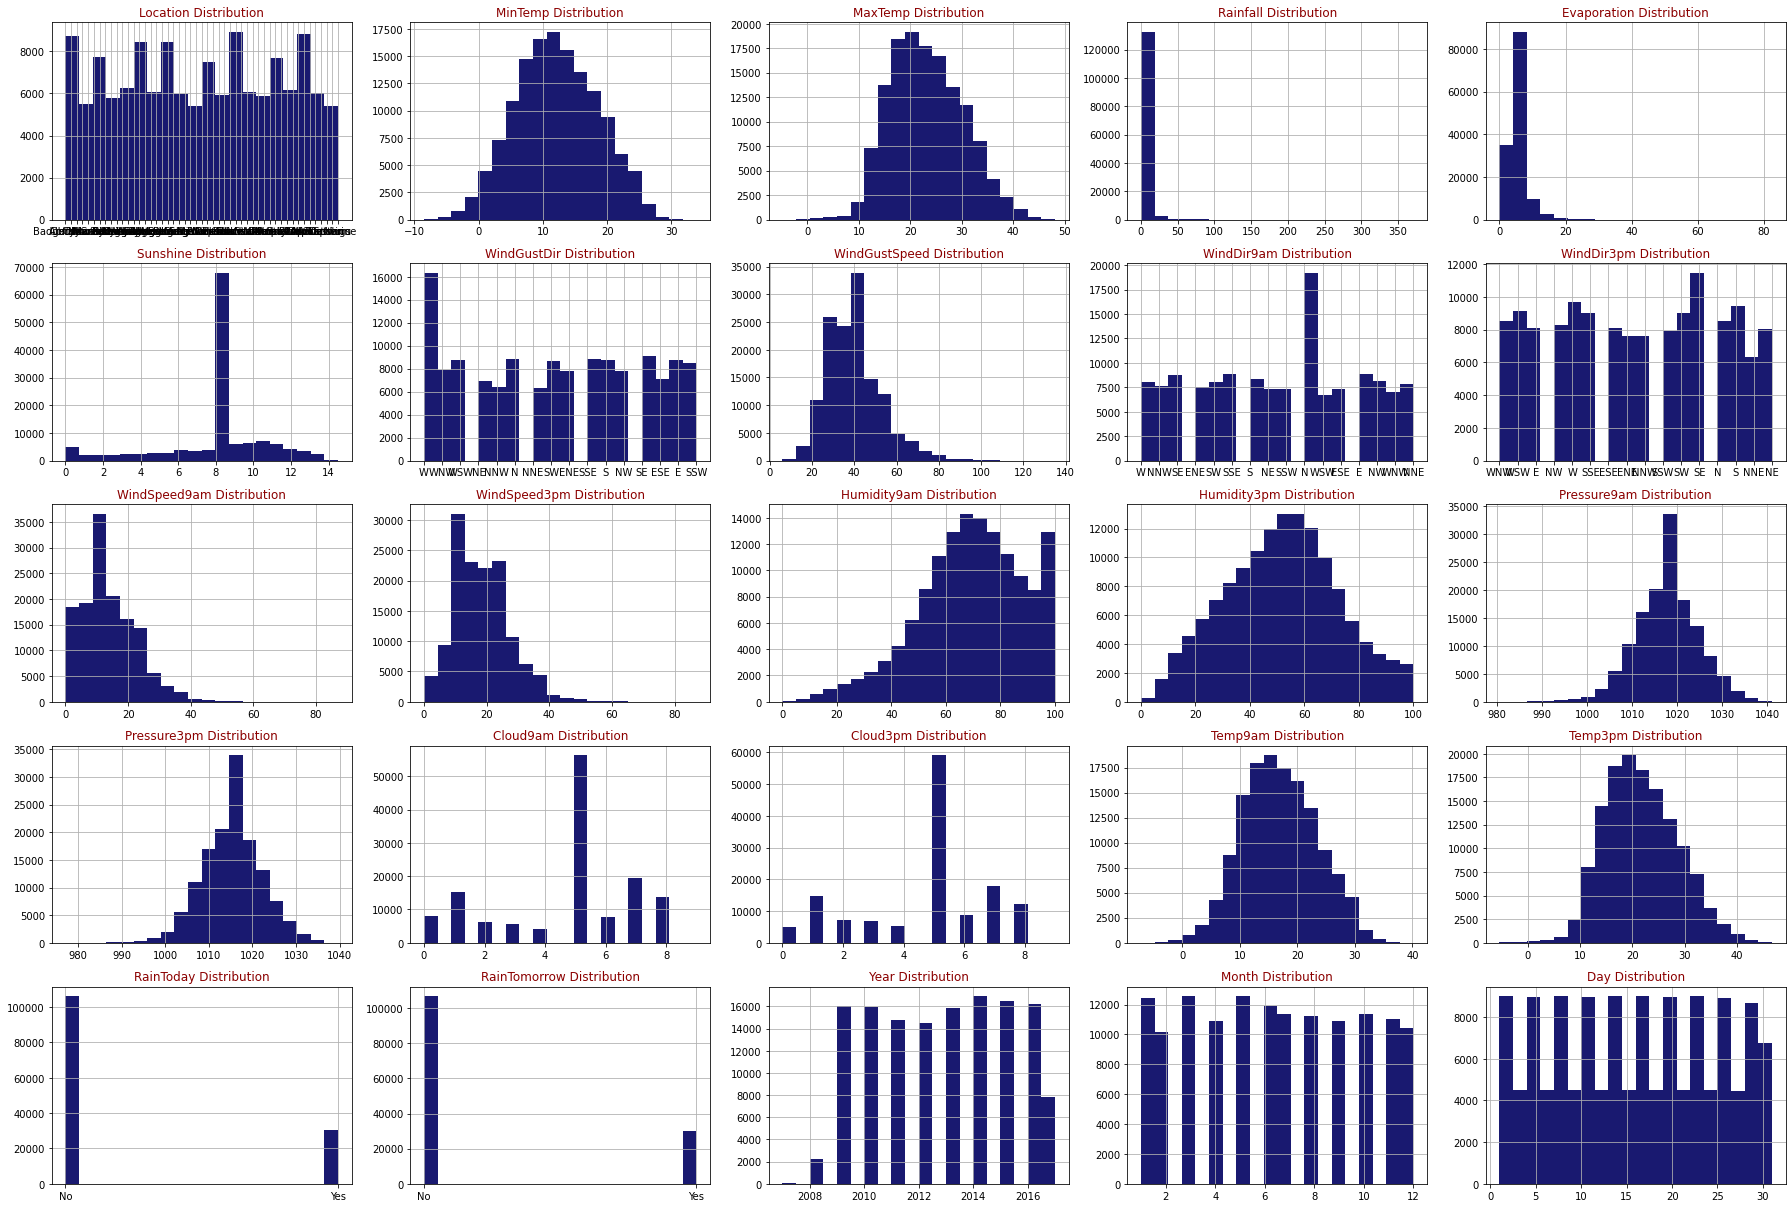

In [36]:
#view distribution with histogram
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(25,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(rains,rains.columns,6,5)

***v. Data Preprocessing***

In [37]:
rains.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [38]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in rains:
    if rains[col].dtype == 'object':
        if len(list(rains[col].unique())) >= 2:
            le.fit(rains[col])
            rains[col] = le.transform(rains[col])

            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

6 columns were label encoded.


In [39]:
rains.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2


In [40]:
scaler = StandardScaler()
rains[numerical] = scaler.fit_transform(rains[numerical])
rains.shape

(136806, 25)

In [41]:
rains.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,0.193105,-0.046011,-0.205793,-0.119958,0.14607,13,0.306848,13,14,...,-1.216605,1.457782,0.14207,-0.007249,0.012338,0,0,2008,12,1
1,2,-0.747987,0.265592,-0.277429,-0.119958,0.14607,14,0.306848,6,15,...,-1.112436,0.150859,0.14207,0.039095,0.373604,0,0,2008,12,2


In [42]:
#declare label and feature variable

X = rains.drop(['RainTomorrow'], axis=1)

y = rains['RainTomorrow']

In [43]:
X.shape, y.shape

((136806, 24), (136806,))

In [44]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45, stratify=y)

In [45]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((109444, 24), (27362, 24))

***vi. Model Building***

**Support Vector Machine (SVM)**

In [46]:
from time import time
from sklearn.svm import SVC

t0 = time()
modelSVC=SVC(C=0.5 ,random_state=42, probability=True)
modelSVC.fit(X_train,y_train)
y_pred=modelSVC.predict(X_test)

In [47]:
print('Time for training model with SVC:{0:0.4f}'.format(time() - t0), 'second')

Time for training model with SVC:9016.8970 second


In [48]:
y_pred.shape

(27362,)

**Model Evaluating for SVM**

- *Model Accuracy*

In [49]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7815


- *Compare the train-set and test-set accuracy for check overfitting and underfitting*

In [50]:
y_pred_train = modelSVC.predict(X_train)

In [51]:
print('Training set score: {:.4f}'.format(modelSVC.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(modelSVC.score(X_test, y_test)))

Training set score: 0.7815
Test set score: 0.7815


The training-set accuracy score is 0.8134 while the test-set accuracy to be 0.8267. These two values are quite comparable. So, there is no question of overfitting.

- *Confusion Matrix*

In [52]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21383     0]
 [ 5979     0]]

True Positives(TP) =  21383

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  5979


<AxesSubplot:>

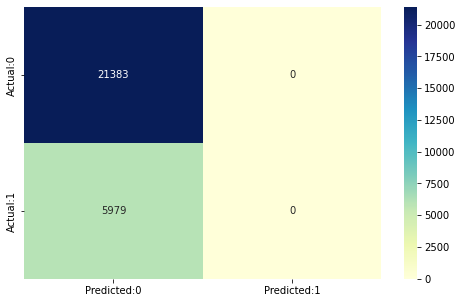

In [53]:
#visualizing confussion Matrix
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

- *Classification Metrices*

In [54]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     21383
           1       0.00      0.00      0.00      5979

    accuracy                           0.78     27362
   macro avg       0.39      0.50      0.44     27362
weighted avg       0.61      0.78      0.69     27362



In [55]:
#Classification Accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [56]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7815


In [57]:
#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2185


**Model Inference for SVM**

In [58]:
#making new data
new_data=[[2.,-0.74,0.35,-0.27,0.001975,-0.005402,14.,0.454086,
          6.,7.,0.557876,0.830841,-1.246006,-1.415702,-1.482429,-0.979219,1.119651,0.001363,
          -0.007249,0.012338,1.,2024,12,5]]

In [59]:
result = modelSVC.predict(new_data)
result = pd.DataFrame(result)
result

,0
0,0


The results of entering new data on the model show the predict that Rain Tomorrow = 0, it's mean No for Rain Tomorrow

**Logistic Regression**

In [60]:
from time import time

t0 = time()
logreg=LogisticRegression(random_state=42)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [61]:
print('Time for training model with SVC:{0:0.4f}'.format(time() - t0), 'second')

Time for training model with SVC:1.4128 second


In [62]:
y_pred.shape

(27362,)

**Model Evaluating for Logistic Regression**

- *Model Accuracy*

In [63]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8398


- *Compare the train-set and test-set accuracy for check overfitting and underfitting*

In [64]:
y_pred_train = logreg.predict(X_train)

In [65]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8380
Test set score: 0.8398


The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting.

- *Confusion Matrix*

In [66]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20185  1198]
 [ 3186  2793]]

True Positives(TP) =  20185

True Negatives(TN) =  2793

False Positives(FP) =  1198

False Negatives(FN) =  3186


<AxesSubplot:>

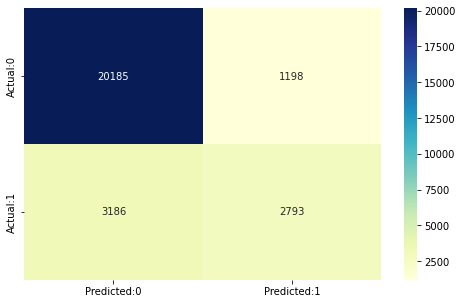

In [67]:
#visualizing confussion Matrix
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

- *Classification Metrices*

In [68]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     21383
           1       0.70      0.47      0.56      5979

    accuracy                           0.84     27362
   macro avg       0.78      0.71      0.73     27362
weighted avg       0.83      0.84      0.83     27362



In [69]:
#Classification Accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [70]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8398


In [71]:
#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1602


**Model Inference for LogReg**

In [72]:
result = logreg.predict(new_data)
result = pd.DataFrame(result)
result

,0
0,0


The results of entering new data on the model show the predict that Rain Tomorrow = 0, it's mean No for Rain Tomorrow

***x. Conclussion***

Model Analysis : 

- SVM model accuracy score is 0.8267 and Logreg model is 0,8366 . So, both of models are very good job in predicting whether or not it will rain tomorrow in Australia.

- Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

- The model shows no signs of overfitting or underfitting.

- The most visible difference between these two models is the time used to train the model, with almost the same accuracy, it is more recommended to use logistic regression. However, in some cases SVM can be used as an option if there is a multiclass problem

Overall Analysis :

The conclusion is to answer the problem by making models using SVM and Logistic Regression then comparing them. The purpose of making the model is predicting Rain Tomorrow using existing data. 
